In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

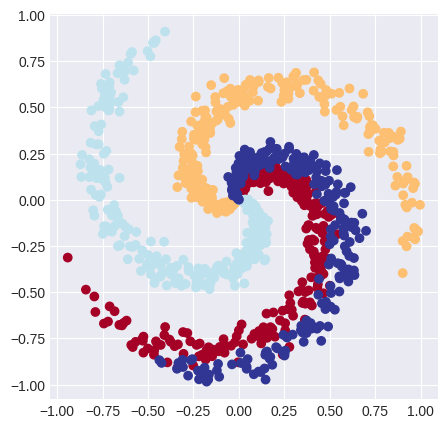

In [2]:
from sklearn.model_selection import train_test_split

def generate_spiral(num_points, num_classes, noise=0.2):
    X, y = [], []
    for class_number in range(num_classes):
        r = np.linspace(0.0, 1, num_points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, num_points) + np.random.randn(num_points) * noise
        x1, x2 = r * np.sin(t), r * np.cos(t)
        X.append(np.c_[x1, x2])
        y.append(np.full(num_points, class_number))
    X, y = np.concatenate(X), np.concatenate(y)
    return X, y

X, y = generate_spiral(
    num_points=250, 
    num_classes=4,
    noise=0.2
)

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=64)

In [3]:
class SpiralsModelV0(nn.Module):
    def __init__(self, in_shape, hidden_units, out_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=in_shape, out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_shape),
            nn.Sigmoid()
        )

    def forward(self, X):
        return self.layer_stack.forward(X)

model = SpiralsModelV0(
    in_shape=2, hidden_units=15, out_shape=4
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [4]:
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_logits = model.forward(X_train)
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 1.386568307876587
Epoch: 100 | Loss: 0.8986010551452637
Epoch: 200 | Loss: 0.8263198733329773
Epoch: 300 | Loss: 0.8039979338645935
Epoch: 400 | Loss: 0.8006608486175537
Epoch: 500 | Loss: 0.7949283719062805
Epoch: 600 | Loss: 0.7927777767181396
Epoch: 700 | Loss: 0.7917464971542358
Epoch: 800 | Loss: 0.7908777594566345
Epoch: 900 | Loss: 0.7894412875175476


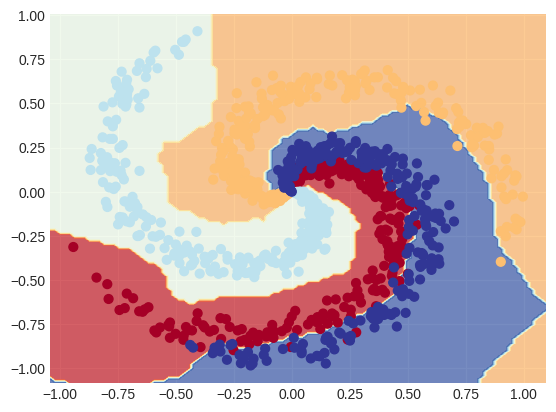

In [5]:
plot_decision_boundary(model, X, y)